# Hierarchical Clustering and KMeans - Segmentation in Telecom Industry

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Data - Telco

Group similar customers and analyse the pattern.

In [2]:
telco = pd.read_csv("Telco.csv")
telco.shape

(1000, 5)

In [3]:
telco.sample(10)

,Calls,Intern,Text,Data,Age
707,5.73,1.02,239.55,4.04,26
936,3.26,0.34,298.54,2.03,27
459,2.80,0.28,313.38,1.71,32
737,2.97,1.16,58.02,0.19,50
623,1.77,0.12,428.98,4.34,22
528,2.80,0.36,281.19,1.84,32
255,2.06,0.11,462.97,3.52,21
275,1.04,0.23,21.49,0.17,61
590,5.81,1.15,21.81,1.90,50
926,1.10,0.18,22.14,0.23,66


It's a masked data. Variables are in different scale (because of proprietary issue the company has masked it and uploaded it in common fourm)

### Scaling

Whenever we are dealing with distance matrix, it is recommended to scale the data.

In [4]:
telco_scaled = telco.apply(lambda x: (x-np.mean(x))/np.std(x))

In [5]:
telco_scaled.head()

,Calls,Intern,Text,Data,Age
0,-0.996125,-0.569290,-0.940982,-1.299162,1.372936
1,-1.022513,-0.489795,-0.969806,-1.262765,1.002273
2,0.600387,-0.383802,0.303060,0.018380,-0.233271
3,-1.015916,-0.516293,-0.963302,-1.277324,1.434713
4,-1.048902,-0.436798,-0.957780,-1.284603,1.125827


Even if the data is already scaled, during masking; re-scaling doesn't affect the data: while scaling the mean will be zero and st.dev will be 1; so re-scaling won't affect anything.

In [6]:
telco_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Calls,1000.0,-1.989964e-15,1.0005,-1.174248,-0.752030,-0.389186,0.569051,2.223288
Intern,1000.0,-2.852385e-15,1.0005,-0.834273,-0.781276,-0.489795,1.020609,2.107040
Text,1000.0,1.069034e-15,1.0005,-0.973315,-0.955721,-0.161414,1.050073,1.749616
Data,1000.0,-1.973387e-15,1.0005,-1.306441,-1.051668,0.011101,0.682610,2.056566
Age,1000.0,-2.446932e-16,1.0005,-1.592368,-0.851042,-0.171493,0.816941,2.114262


In [7]:
#inbuilt - scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(telco)
#converting it to df
x = pd.DataFrame(x_scaled, columns = telco.columns)

In [8]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Calls,1000.0,-2.193801e-16,1.0005,-1.174248,-0.752030,-0.389186,0.569051,2.223288
Intern,1000.0,-1.174616e-16,1.0005,-0.834273,-0.781276,-0.489795,1.020609,2.107040
Text,1000.0,2.942091e-17,1.0005,-0.973315,-0.955721,-0.161414,1.050073,1.749616
Data,1000.0,-5.136169e-17,1.0005,-1.306441,-1.051668,0.011101,0.682610,2.056566
Age,1000.0,-2.619016e-16,1.0005,-1.592368,-0.851042,-0.171493,0.816941,2.114262


### Plotting a Dendogram

In [9]:
import scipy
import matplotlib as mpl
from matplotlib.pyplot import cm
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

#changing colour theme of dendrogram - since im using black theme
cmap = cm.rainbow(np.linspace(0, 1, 10))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

Study the functions:

* dendogram
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html 

* linkeage
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [10]:
z = linkage(telco_scaled, 'complete')

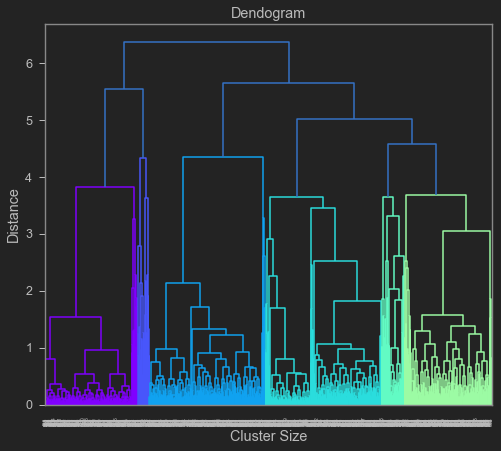

In [11]:
dendrogram(z)
plt.title("Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#plt.style.use('dark_background')
plt.show()

we can't read the clusters because we have lot of observations(1000), but in smaller dataset we can. 

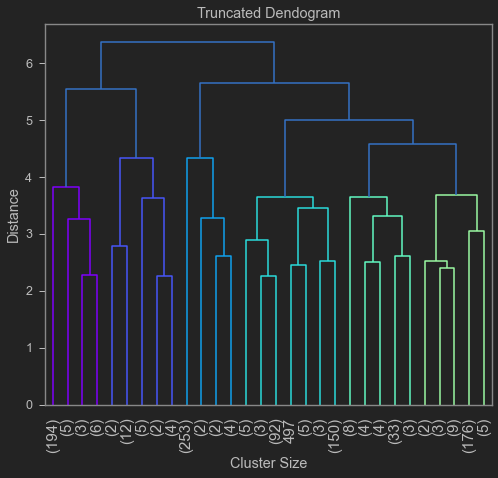

In [12]:
dendrogram(z,truncate_mode='lastp', p =30, leaf_rotation=90, leaf_font_size=15.)
plt.title("Truncated Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.show()

### Agglomerative Hierarchical Clustering

In [25]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [26]:
hclust = AgglomerativeClustering(n_clusters=5, affinity= 'euclidean', linkage = 'complete') 

In [27]:
hclust.fit(telco_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

### Grouping the data

In [28]:
telco['Groups'] = hclust.labels_

In [29]:
#labels
hclust.labels_[:10]

array([3, 3, 4, 3, 3, 0, 3, 4, 0, 4], dtype=int64)

In [30]:
telco.head(10)

,Calls,Intern,Text,Data,Age,Groups
0,1.12,0.19,23.92,0.18,60,3
1,1.08,0.22,17.76,0.23,54,3
2,3.54,0.26,289.79,1.99,34,4
3,1.09,0.21,19.15,0.21,61,3
4,1.04,0.24,20.33,0.20,56,3
5,5.59,0.88,19.23,2.02,41,0
6,1.19,0.19,17.94,0.24,71,3
7,3.07,0.34,359.49,2.06,30,4
8,5.34,0.99,295.47,0.97,41,0
9,2.43,0.09,17.57,0.46,33,4


### Profiling : Checking the Aggregate of the groups

In [31]:
telco.groupby(['Groups']).mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,4.472227,1.010486,82.832146,2.009190,43.149798
1,4.700400,0.432400,376.350800,1.545600,46.120000
2,1.763410,0.131456,507.732146,3.731073,19.003831
3,1.068846,0.238702,45.874567,0.355288,60.610577
4,2.800039,0.233514,204.993282,1.475405,32.424710


### K-Means Clustering

In [32]:
from sklearn.cluster import KMeans

In [33]:
km = KMeans(n_clusters=5,n_init =40) #init = 40->K means++ take 40 randompoints and check which is best.

In [34]:
#fit the k-means model
km.fit(telco_scaled)

KMeans(n_clusters=5, n_init=40)

In [35]:
#cluster labels (checking for first 10)
km.labels_[:10]

array([1, 1, 3, 1, 1, 2, 1, 3, 2, 4])

In [36]:
#within group SSE
km.inertia_

785.9517944329599

In [40]:
#calculating the within group SSE for different solutions
I = []
for k in [2,3,4,5,6,7]:
    km = KMeans(n_clusters=k,n_init =40)
    inertia = km.fit(telco_scaled).inertia_
    I.append(inertia)

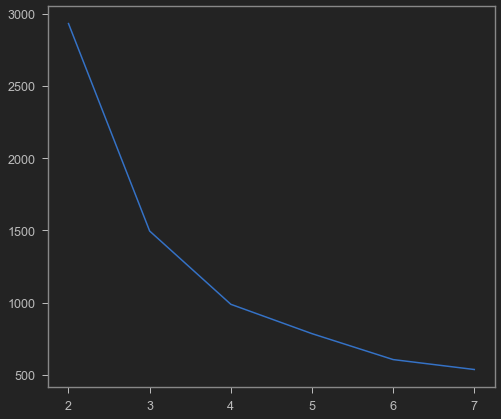

In [42]:
#ploting the scree plot
plt.plot([2,3,4,5,6,7], I)
plt.show()

In [43]:
#home work:
#compare k=5,in kmeans, vs agglomerative-complete linkeage cluster size 5